# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

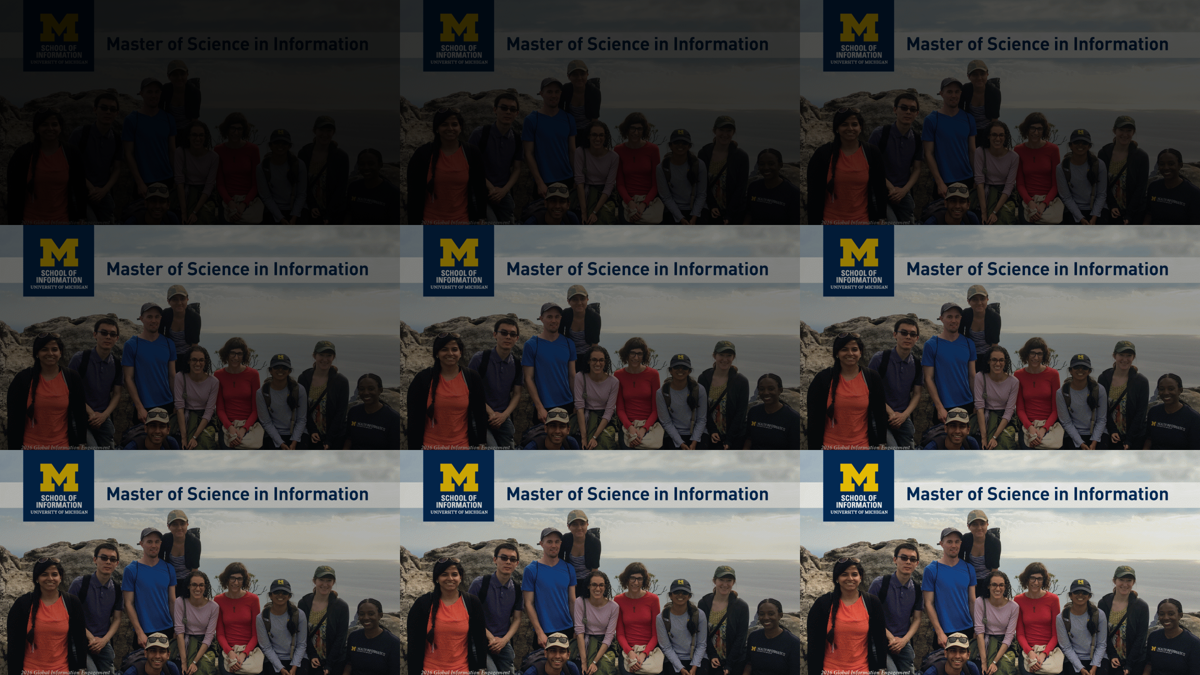

In [40]:
### GIVEN CODE
import PIL
from PIL import Image
from PIL import ImageEnhance
# 0.0(a completely black image) and 1.0(the original image)
from IPython.display import display

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')


# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))
    
#print(images)

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

## Assignment




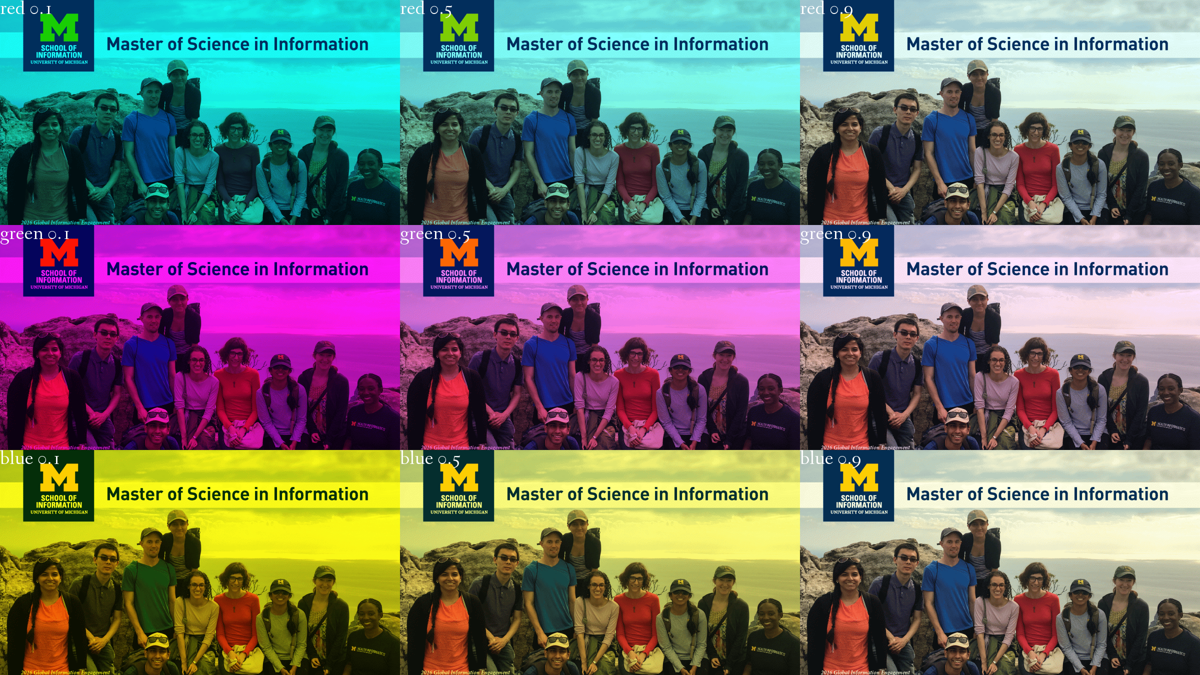

In [15]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

# Read image and convert to RGB
image = Image.open("readonly/msi_recruitment.gif")
image = image.convert('RGB')

# Build a list of 9 images which have different color channel intensities
intensities = [0.1, 0.5, 0.9]
channels = ['red', 'green', 'blue']
images = []

for channel in channels:
    for intensity in intensities:
        # Create a new image by copying the original image
        new_image = image.copy()

        # Split the image into color channels
        r, g, b = new_image.split()

        # Adjust the intensity of the specified color channel
        if channel == 'red':
            r = ImageEnhance.Brightness(r).enhance(intensity)
        elif channel == 'green':
            g = ImageEnhance.Brightness(g).enhance(intensity)
        elif channel == 'blue':
            b = ImageEnhance.Brightness(b).enhance(intensity)

        # Merge the color channels back into a single image
        new_image = Image.merge('RGB', (r, g, b))

        # Add the modified image to the list
        images.append(new_image)

# Create a contact sheet from different color channel intensities
first_image = images[0]
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width * 3, first_image.height * 3))
x = 0
y = 0

# Load the font
font = ImageFont.truetype("readonly/fanwood-webfont.ttf", 40)

draw = ImageDraw.Draw(contact_sheet)

for i, img in enumerate(images):
    # Paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y))

    # Add text to the image indicating the color channel and intensity
    channel_text = channels[i // len(intensities)]
    intensity_text = str(intensities[i % len(intensities)])
    draw.text((x, y), f'{channel_text} {intensity_text}', font=font, fill='white')

    # Update the position for the next image
    x += first_image.width
    if x >= contact_sheet.width:
        x = 0
        y += first_image.height

# Resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width / 2), int(contact_sheet.height / 2)))
display(contact_sheet)


### Additional functions

In [32]:
import inspect
inspect.getmro(type(image))

(PIL.Image.Image, object)

In [33]:
blurred_image = image.filter(PIL.ImageFilter.BLUR)
embossed_image = image.filter(PIL.ImageFilter.EMBOSS)
sharpened_image = image.filter(PIL.ImageFilter.SHARPEN)
boxblurred_image = image.filter(PIL.ImageFilter.BoxBlur(1))
medianfilter_image = image.filter(PIL.ImageFilter.MedianFilter(size=7))

In [34]:
print("{}x{}".format(image.width,image.height))

800x450


[<PIL.Image.Image image mode=RGB size=800x450 at 0x7FE1CD01E990>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7FE1D3833A90>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7FE1D217E390>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7FE1D3833310>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7FE1D385F690>]


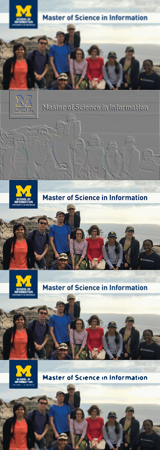

In [38]:
imgs = [blurred_image, embossed_image, sharpened_image, boxblurred_image, medianfilter_image]
print(imgs)
first_image=imgs[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,5*first_image.height))
current_location = 0
for img in imgs:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (0, current_location) )
    # And update the current_location counter
    current_location=current_location+450

# This contact sheet has gotten big:2,250 pixels tall! We'll resize everything down to the size of just two individual images
contact_sheet = contact_sheet.resize((160,450) )
# Now lets just display that composite image
display(contact_sheet)

In [35]:
help(image.crop)
#bounding box as upper left corner (0.0 pixel) and the lower right corner

Help on method crop in module PIL.Image:

crop(box=None) method of PIL.Image.Image instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.
    
    Note: Prior to Pillow 3.4.0, this was a lazy operation.
    
    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



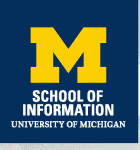

In [36]:
display(image.crop((50,0,190,150)))

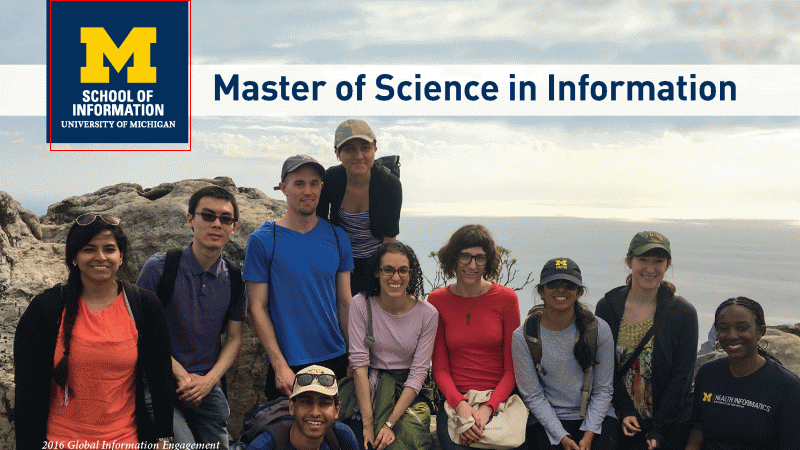

In [37]:
from PIL import ImageDraw
drawing_object = ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline='red')
display(image)

## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.